In [1]:
import pandas as pd
import numpy as np
import os

In [2]:
DATASET_DIR = ''
dir_name = './'
file_name = 'BigCitiesHealth.csv'

In [6]:
file_path = os.path.join(DATASET_DIR,dir_name,file_name)
df = pd.read_csv(file_path)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56353 entries, 0 to 56352
Data columns (total 31 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   metric_item_label                56353 non-null  object 
 1   metric_cat_label                 56353 non-null  object 
 2   metric_subcat_label              56352 non-null  object 
 3   metric_item_label_subtitle       56352 non-null  object 
 4   metric_cat_item_yaxis_label      56352 non-null  object 
 5   metric_source_desc_label_fn      56352 non-null  object 
 6   metric_source_desc_label_url_fn  56352 non-null  object 
 7   geo_label_city                   56352 non-null  object 
 8   geo_label_state                  56071 non-null  object 
 9   geo_label_citystate              56352 non-null  object 
 10  geo_fips_code                    56071 non-null  float64
 11  value                            56352 non-null  float64
 12  date_label        

In [7]:
df["metric_label"] = df["metric_subcat_label"]+' | '+df["metric_item_label"] 

In [8]:
df["metric_label"].value_counts()

metric_label
Deaths | Deaths from All Causes                           6244
Cancer | All Cancer Deaths                                6233
Cardiovascular Disease | Cardiovascular Disease Deaths    6195
Cardiovascular Disease | Heart Disease Deaths             6138
Diabetes and Obesity | Diabetes Deaths                    5489
Cancer | Lung Cancer Deaths                               5488
Cancer | Colorectal Cancer Deaths                         5057
Disability | People with Disabilities                     2743
Deaths | Premature Death                                  2635
Cancer | Breast Cancer Deaths                             1786
Cancer | Prostate Cancer Deaths                           1726
Diabetes and Obesity | Teen Obesity                        571
Physical Activity | Teen Physical Activity                 566
Physical Activity | Teen TV Time                           555
Physical Activity | Teen Physical Inactivity               549
Physical Activity | Teen Computer Time    

1. race/sex stratified 된 데이터 체크

In [9]:
#컬럼 이름에 층위가 들어간 컬럼만 따로 분리
list(filter(lambda x: 'strata' in x,df.columns))

['geo_strata_region',
 'geo_strata_poverty',
 'geo_strata_Population',
 'geo_strata_PopDensity',
 'geo_strata_Segregation',
 'strata_race_label',
 'strata_sex_label',
 'strata_race_sex_label']

In [10]:

col_list = ['geo_strata_region',
 'geo_strata_poverty',
 'geo_strata_Population',
 'geo_strata_PopDensity',
 'geo_strata_Segregation']
for col in col_list:
    display(df[col].value_counts())

geo_strata_region
West         20501
South        18177
Midwest      11460
Northeast     5933
Name: count, dtype: int64

geo_strata_poverty
Less poor cities (<18% poor)    42668
Poorest cities (18%+ poor)      13403
Name: count, dtype: int64

geo_strata_Population
Smaller (<1.3 million)    39155
Largest (>1.3 million)    16916
Name: count, dtype: int64

geo_strata_PopDensity
Lower pop. density (<10k per sq mi)      44709
Highest pop. density (>10k per sq mi)    11362
Name: count, dtype: int64

geo_strata_Segregation
Less Segregated (<50%)      30860
Highly Segregated (50%+)    25211
Name: count, dtype: int64

In [11]:
col_list = ['strata_race_label',
 'strata_sex_label',
 'strata_race_sex_label']
for col in col_list:
    display(df[col].value_counts())

strata_race_label
All                              15890
White                            11207
Black                            11084
Hispanic                          9597
Asian/PI                          7664
Asian                              455
American Indian/Alaska Native      455
Name: count, dtype: int64

strata_sex_label
Both      26732
Male      15117
Female    14503
Name: count, dtype: int64

strata_race_sex_label
Black Male         3280
White Male         3142
White Female       3080
Black Female       2901
Hispanic Male      2788
Hispanic Female    2524
Asian/PI Female    2275
Asian/PI Male      2184
Name: count, dtype: int64

In [12]:
np.sum(df['strata_sex_label'].isna())

1

In [13]:
cond1 = (df['strata_race_label'] == 'All') & (df['strata_sex_label'] == 'Both')
np.sum(cond1)

8444

In [14]:
cond0 =(df['strata_sex_label'] == 'Both')
display(df.loc[cond0,'strata_race_label'].value_counts())

strata_race_label
All                              8444
White                            4985
Black                            4903
Hispanic                         4285
Asian/PI                         3205
Asian                             455
American Indian/Alaska Native     455
Name: count, dtype: int64

In [15]:
cond0 =(df['strata_race_label'] == 'All')
display(df.loc[cond0,'strata_sex_label'].value_counts())

strata_sex_label
Both      8444
Female    3723
Male      3723
Name: count, dtype: int64

In [16]:
cond0 = (df['strata_race_sex_label'].isna())
display(df.loc[cond0,'strata_race_label'].value_counts())
display(df.loc[cond0,'strata_sex_label'].value_counts())

strata_race_label
All                              15890
White                             4985
Black                             4903
Hispanic                          4285
Asian/PI                          3205
Asian                              455
American Indian/Alaska Native      455
Name: count, dtype: int64

strata_sex_label
Both      26732
Female     3723
Male       3723
Name: count, dtype: int64

In [17]:
cond0 = (~df['strata_race_sex_label'].isna())
display(df.loc[cond0,['strata_race_sex_label','strata_race_label']].value_counts())
display(df.loc[cond0,['strata_race_sex_label','strata_sex_label']].value_counts())

strata_race_sex_label  strata_race_label
Black Male             Black                3280
White Male             White                3142
White Female           White                3080
Black Female           Black                2901
Hispanic Male          Hispanic             2788
Hispanic Female        Hispanic             2524
Asian/PI Female        Asian/PI             2275
Asian/PI Male          Asian/PI             2184
Name: count, dtype: int64

strata_race_sex_label  strata_sex_label
Black Male             Male                3280
White Male             Male                3142
White Female           Female              3080
Black Female           Female              2901
Hispanic Male          Male                2788
Hispanic Female        Female              2524
Asian/PI Female        Female              2275
Asian/PI Male          Male                2184
Name: count, dtype: int64

2. geo_strata 관련 column들 확인

In [18]:
df['geo_label_city'].unique()

array(['Cleveland', 'Oakland', 'San Francisco', 'Long Beach', 'Dallas',
       'Las Vegas', 'San Antonio', 'Columbus', 'Seattle', 'New York City',
       'Tucson', 'Phoenix', 'Fort Worth', 'Indianapolis', 'Oklahoma City',
       'San Diego', 'Houston', 'Boston', 'Philadelphia', 'Denver',
       'Charlotte', 'Portland', 'Kansas City', 'Los Angeles',
       'Washington', 'Detroit', 'Chicago', 'Milwaukee', 'San Jose',
       'Austin', 'Memphis', 'Louisville', 'Baltimore', 'Minneapolis',
       'El Paso', 'U.S. Total', nan], dtype=object)

In [19]:
col_list = ['geo_strata_region',
 'geo_strata_poverty',
 'geo_strata_Population',
 'geo_strata_PopDensity',
 'geo_strata_Segregation']
df[['geo_label_city']+col_list].value_counts()

geo_label_city  geo_strata_region  geo_strata_poverty            geo_strata_Population   geo_strata_PopDensity                  geo_strata_Segregation  
San Diego       West               Less poor cities (<18% poor)  Largest (>1.3 million)  Lower pop. density (<10k per sq mi)    Less Segregated (<50%)      2031
Philadelphia    Northeast          Poorest cities (18%+ poor)    Largest (>1.3 million)  Highest pop. density (>10k per sq mi)  Highly Segregated (50%+)    2029
New York City   Northeast          Less poor cities (<18% poor)  Largest (>1.3 million)  Highest pop. density (>10k per sq mi)  Highly Segregated (50%+)    2024
Houston         South              Poorest cities (18%+ poor)    Largest (>1.3 million)  Lower pop. density (<10k per sq mi)    Highly Segregated (50%+)    2013
Los Angeles     West               Less poor cities (<18% poor)  Largest (>1.3 million)  Lower pop. density (<10k per sq mi)    Highly Segregated (50%+)    1967
Chicago         Midwest            Less po

In [20]:
len(df[['geo_label_city']+col_list].value_counts()), len(df['geo_label_city'].value_counts())


(35, 36)

3. value_ci 관련 col 확인

In [21]:
df['value_ci_flag_yesno'].value_counts()

value_ci_flag_yesno
yes    52187
no      4165
Name: count, dtype: int64

In [22]:
np.sum(df['value_ci_flag_yesno'].isna())

1

In [23]:
list(filter(lambda x: 'ci' in x,df.columns))

['geo_label_city',
 'geo_label_citystate',
 'value_ci_flag_yesno',
 'value_95_ci_low',
 'value_95_ci_high',
 'value_90_ci_low',
 'value_90_ci_high']

In [24]:
df[['value_90_ci_low']].info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56353 entries, 0 to 56352
Data columns (total 1 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   value_90_ci_low  0 non-null      float64
dtypes: float64(1)
memory usage: 440.4 KB


In [25]:
df[['value_ci_flag_yesno',
    'value_95_ci_low',
 'value_95_ci_high']]

,value_ci_flag_yesno,value_95_ci_low,value_95_ci_high
0,yes,195.006700,225.194591
1,yes,124.494012,211.553695
2,yes,92.047403,101.613187
3,yes,88.474786,122.786969
4,yes,275.648062,320.086062
...,...,...,...
56348,yes,2031.187450,4311.444818
56349,yes,9788.924394,11408.198670
56350,yes,4502.881161,6035.752532
56351,yes,6882.495729,7719.182923


In [26]:
#flag = yes 일 경우 4가지 정보 모두 존재
# no 일 경우 최소 1가지 이상 공백
col_list = ['value_95_ci_low',
 'value_95_ci_high']

cond1 = df[col_list].isna().all(axis=1)
cond2 = df['value_ci_flag_yesno'] == 'no'


cond3 = df[col_list].isna().any(axis=1)
cond4 = df['value_ci_flag_yesno'] == 'yes'

# np.sum(cond1 != cond2), np.sum(cond1), np.sum(cond2)

np.sum((~cond3) != cond4), np.sum(~cond3), np.sum(cond4)

(12, 52175, 52187)

In [27]:
len(df.loc[cond1,'metric_label'].unique())

24

In [28]:
# CI가 존재하는 컬럼 = 53개
len(df.loc[~cond1,'metric_label'].unique())

23

In [29]:
df.loc[~cond1,'metric_label'].value_counts()

metric_label
Deaths | Deaths from All Causes                           6231
Cancer | All Cancer Deaths                                6220
Cardiovascular Disease | Cardiovascular Disease Deaths    6182
Cardiovascular Disease | Heart Disease Deaths             6125
Diabetes and Obesity | Diabetes Deaths                    5476
Cancer | Lung Cancer Deaths                               5475
Cancer | Colorectal Cancer Deaths                         5044
Deaths | Premature Death                                  2635
Cancer | Breast Cancer Deaths                             1773
Cancer | Prostate Cancer Deaths                           1713
Cardiovascular Disease | High Blood Pressure               455
Diabetes and Obesity | Diabetes                            455
Diabetes and Obesity | Adult Obesity                       455
Physical Activity | Adult Physical Inactivity              455
Diabetes and Obesity | Teen Obesity                        429
Physical Activity | Teen Physical Activity

In [30]:
metric_w_ci = set(df.loc[~cond1,'metric_label'].unique())
metric_wo_ci = set(df.loc[cond1,'metric_label'].unique())

metric_w_ci.difference(metric_wo_ci)

df[df['metric_label'] == 'Deaths | Premature Death'][col_list]

,value_95_ci_low,value_95_ci_high
53717,12017.425830,15242.289810
53718,2826.211311,3559.397128
53719,3489.883205,4476.346755
53720,4595.894356,5792.166134
53721,2505.775241,5565.075217
...,...,...
56347,7128.376399,7892.535462
56348,2031.187450,4311.444818
56349,9788.924394,11408.198670
56350,4502.881161,6035.752532


In [31]:
len(metric_wo_ci.difference(metric_w_ci)), len(metric_wo_ci)

(2, 24)

In [32]:
metirc_null_ci = sorted(list(metric_wo_ci.difference(metric_w_ci)))

for col in metirc_null_ci[:20]:
    cond = df['metric_label'] == col
    print(col.ljust(75),f"     : {np.sum(cond):>10}")

TypeError: '<' not supported between instances of 'float' and 'str'

In [33]:
for col in metirc_null_ci[20:40]:
    cond = df['metric_label'] == col
    print(col.ljust(75),f"     : {np.sum(cond):>10}")

NameError: name 'metirc_null_ci' is not defined

In [34]:
for col in metirc_null_ci[40:]:
    cond = df['metric_label'] == col
    print(col.ljust(75),f"     : {np.sum(cond):>10}")

NameError: name 'metirc_null_ci' is not defined

### U.S. Total 분리

In [35]:
df['geo_label_city'].value_counts()

geo_label_city
San Diego        2031
Philadelphia     2029
New York City    2024
Houston          2013
Los Angeles      1967
Chicago          1956
San Francisco    1914
Boston           1880
Oakland          1819
Las Vegas        1761
Seattle          1744
Fort Worth       1722
Dallas           1707
Phoenix          1626
Long Beach       1616
Portland         1610
Charlotte        1602
San Jose         1584
Austin           1565
San Antonio      1563
Washington       1559
Denver           1544
Baltimore        1489
Oklahoma City    1456
Detroit          1437
Cleveland        1409
Kansas City      1382
Columbus         1375
Indianapolis     1337
Milwaukee        1322
Tucson           1285
Minneapolis      1242
El Paso          1242
Memphis          1177
Louisville       1082
U.S. Total        281
Name: count, dtype: int64

In [36]:
cond0 = df['geo_label_city'] == 'U.S. Total'

df_US = df.loc[cond0].copy()
df_city = df.loc[~cond0].copy()

display(df_US.info())
display(df_city.info())

<class 'pandas.core.frame.DataFrame'>
Index: 281 entries, 5718 to 53203
Data columns (total 32 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   metric_item_label                281 non-null    object 
 1   metric_cat_label                 281 non-null    object 
 2   metric_subcat_label              281 non-null    object 
 3   metric_item_label_subtitle       281 non-null    object 
 4   metric_cat_item_yaxis_label      281 non-null    object 
 5   metric_source_desc_label_fn      281 non-null    object 
 6   metric_source_desc_label_url_fn  281 non-null    object 
 7   geo_label_city                   281 non-null    object 
 8   geo_label_state                  0 non-null      object 
 9   geo_label_citystate              281 non-null    object 
 10  geo_fips_code                    0 non-null      float64
 11  value                            281 non-null    float64
 12  date_label            

None

<class 'pandas.core.frame.DataFrame'>
Index: 56072 entries, 0 to 56352
Data columns (total 32 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   metric_item_label                56072 non-null  object 
 1   metric_cat_label                 56072 non-null  object 
 2   metric_subcat_label              56071 non-null  object 
 3   metric_item_label_subtitle       56071 non-null  object 
 4   metric_cat_item_yaxis_label      56071 non-null  object 
 5   metric_source_desc_label_fn      56071 non-null  object 
 6   metric_source_desc_label_url_fn  56071 non-null  object 
 7   geo_label_city                   56071 non-null  object 
 8   geo_label_state                  56071 non-null  object 
 9   geo_label_citystate              56071 non-null  object 
 10  geo_fips_code                    56071 non-null  float64
 11  value                            56071 non-null  float64
 12  date_label             

None

In [37]:
cond1 = (df_city['strata_race_label'] == 'All') & (df_city['strata_sex_label'] == 'Both')
np.sum(cond1)

8163

In [38]:
col_list = ['value_95_ci_low',
 'value_95_ci_high',
 'value_90_ci_low',
 'value_90_ci_high']

cond1 = df_city[col_list].isna().all(axis=1)
cond2 = df_city['value_ci_flag_yesno'] == 'no'

np.sum(cond1 != cond2), np.sum(cond1), np.sum(cond2)

(1, 3984, 3983)

In [39]:
df_city.loc[~cond1,'metric_label'].value_counts()

metric_label
Deaths | Deaths from All Causes                           6231
Cancer | All Cancer Deaths                                6220
Cardiovascular Disease | Cardiovascular Disease Deaths    6182
Cardiovascular Disease | Heart Disease Deaths             6125
Diabetes and Obesity | Diabetes Deaths                    5476
Cancer | Lung Cancer Deaths                               5475
Cancer | Colorectal Cancer Deaths                         5044
Deaths | Premature Death                                  2635
Cancer | Breast Cancer Deaths                             1773
Cancer | Prostate Cancer Deaths                           1713
Cardiovascular Disease | High Blood Pressure               455
Diabetes and Obesity | Diabetes                            455
Diabetes and Obesity | Adult Obesity                       455
Physical Activity | Adult Physical Inactivity              455
Diabetes and Obesity | Teen Obesity                        418
Physical Activity | Teen Physical Activity

In [40]:
len(df_city.loc[~cond1,'metric_label'].value_counts())

23

In [41]:
metric_w_ci = set(df_city.loc[~cond1,'metric_label'].unique()) # 최소 한개에 대해 CI 비어있는
metric_wo_ci = set(df_city.loc[cond1,'metric_label'].unique()) # 모든 레코드에 대해 CI 비어있는

metric_w_ci.difference(metric_wo_ci)

{'Cancer | All Cancer Deaths',
 'Cancer | Breast Cancer Deaths',
 'Cancer | Colorectal Cancer Deaths',
 'Cancer | Lung Cancer Deaths',
 'Cancer | Prostate Cancer Deaths',
 'Cardiovascular Disease | Cardiovascular Disease Deaths',
 'Cardiovascular Disease | Heart Disease Deaths',
 'Cardiovascular Disease | High Blood Pressure',
 'Deaths | Deaths from All Causes',
 'Deaths | Premature Death',
 'Diabetes and Obesity | Adult Obesity',
 'Diabetes and Obesity | Diabetes',
 'Diabetes and Obesity | Diabetes Deaths',
 'Physical Activity | Adult Physical Inactivity'}

In [42]:
metirc_full_ci = sorted(list(metric_w_ci.difference(metric_wo_ci)))

for col in metirc_full_ci[:20]:
    cond = df_city['metric_label'] == col
    print(col.ljust(75),f"     : {np.sum(cond):>10}")

Cancer | All Cancer Deaths                                                       :       6220
Cancer | Breast Cancer Deaths                                                    :       1773
Cancer | Colorectal Cancer Deaths                                                :       5044
Cancer | Lung Cancer Deaths                                                      :       5475
Cancer | Prostate Cancer Deaths                                                  :       1713
Cardiovascular Disease | Cardiovascular Disease Deaths                           :       6182
Cardiovascular Disease | Heart Disease Deaths                                    :       6125
Cardiovascular Disease | High Blood Pressure                                     :        455
Deaths | Deaths from All Causes                                                  :       6231
Deaths | Premature Death                                                         :       2635
Diabetes and Obesity | Adult Obesity                        

In [43]:
for col in metirc_full_ci[20:]:
    cond = df_city['metric_label'] == col
    print(col.ljust(75),f"     : {np.sum(cond):>10}")

In [44]:
len(metirc_full_ci)

14

In [45]:
metirc_null_ci = sorted(list(metric_wo_ci.difference(metric_w_ci)))
print(len(metirc_null_ci))

for col in metirc_null_ci:
    cond = df['metric_label'] == col
    print(col.ljust(75),f"     : {np.sum(cond):>10}")

TypeError: '<' not supported between instances of 'float' and 'str'

In [46]:
metirc_null_ci = sorted(list(metric_wo_ci.difference(metric_w_ci)))

for col in metirc_null_ci[20:]:
    cond = df['metric_label'] == col
    print(col.ljust(75),f"     : {np.sum(cond):>10}")

TypeError: '<' not supported between instances of 'float' and 'str'

In [47]:
table = pd.pivot_table(df_city, index=["geo_label_city","date_label"], values='value', columns=['metric_label'])

In [48]:
table[metirc_null_ci]

NameError: name 'metirc_null_ci' is not defined

In [49]:
null_count = table.groupby(by=["geo_label_city", "date_label"])[metirc_null_ci].count()

null_count 
# null_count_city = 

NameError: name 'metirc_null_ci' is not defined

In [50]:
df_city[col_list].isna().astype(int)

,value_95_ci_low,value_95_ci_high,value_90_ci_low,value_90_ci_high
0,0,0,1,1
1,0,0,1,1
2,0,0,1,1
3,0,0,1,1
4,0,0,1,1
...,...,...,...,...
56348,0,0,1,1
56349,0,0,1,1
56350,0,0,1,1
56351,0,0,1,1


In [51]:
df_city

,metric_item_label,metric_cat_label,metric_subcat_label,metric_item_label_subtitle,metric_cat_item_yaxis_label,metric_source_desc_label_fn,metric_source_desc_label_url_fn,geo_label_city,geo_label_state,geo_label_citystate,...,value_90_ci_high,geo_strata_region,geo_strata_poverty,geo_strata_Population,geo_strata_PopDensity,geo_strata_Segregation,strata_race_label,strata_sex_label,strata_race_sex_label,metric_label
0,All Cancer Deaths,Chronic Health Conditions,Cancer,"Deaths from all types of cancer (per 100,000 p...","Per 100,000","National Vital Statistics System (NVSS), Cente...",https://www.cdc.gov/nchs/nvss/index.htm,Cleveland,OH,"Cleveland, OH",...,NaN,Midwest,Poorest cities (18%+ poor),Smaller (<1.3 million),Lower pop. density (<10k per sq mi),Highly Segregated (50%+),Black,Female,Black Female,Cancer | All Cancer Deaths
1,All Cancer Deaths,Chronic Health Conditions,Cancer,"Deaths from all types of cancer (per 100,000 p...","Per 100,000","National Vital Statistics System (NVSS), Cente...",https://www.cdc.gov/nchs/nvss/index.htm,Oakland,CA,"Oakland, CA",...,NaN,West,Less poor cities (<18% poor),Smaller (<1.3 million),Lower pop. density (<10k per sq mi),Less Segregated (<50%),Hispanic,Male,Hispanic Male,Cancer | All Cancer Deaths
2,All Cancer Deaths,Chronic Health Conditions,Cancer,"Deaths from all types of cancer (per 100,000 p...","Per 100,000","National Vital Statistics System (NVSS), Cente...",https://www.cdc.gov/nchs/nvss/index.htm,San Francisco,CA,"San Francisco, CA",...,NaN,West,Less poor cities (<18% poor),Smaller (<1.3 million),Highest pop. density (>10k per sq mi),Less Segregated (<50%),All,Female,NaN,Cancer | All Cancer Deaths
3,All Cancer Deaths,Chronic Health Conditions,Cancer,"Deaths from all types of cancer (per 100,000 p...","Per 100,000","National Vital Statistics System (NVSS), Cente...",https://www.cdc.gov/nchs/nvss/index.htm,Long Beach,CA,"Long Beach, CA",...,NaN,West,Less poor cities (<18% poor),Smaller (<1.3 million),Lower pop. density (<10k per sq mi),Highly Segregated (50%+),Hispanic,Female,Hispanic Female,Cancer | All Cancer Deaths
4,All Cancer Deaths,Chronic Health Conditions,Cancer,"Deaths from all types of cancer (per 100,000 p...","Per 100,000","National Vital Statistics System (NVSS), Cente...",https://www.cdc.gov/nchs/nvss/index.htm,Cleveland,OH,"Cleveland, OH",...,NaN,Midwest,Poorest cities (18%+ poor),Smaller (<1.3 million),Lower pop. density (<10k per sq mi),Highly Segregated (50%+),Black,Male,Black Male,Cancer | All Cancer Deaths
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56348,Premature Death,Life Expectancy and Deaths,Deaths,Years of potential life lost before age 75 (pe...,"Years per 100,000 population aged <75","National Vital Statistics System (NVSS), Cente...",https://www.cdc.gov/nchs/nvss/index.htm,Minneapolis,MN,"Minneapolis, MN",...,NaN,Midwest,Less poor cities (<18% poor),Smaller (<1.3 million),Lower pop. density (<10k per sq mi),Less Segregated (<50%),Hispanic,Female,Hispanic Female,Deaths | Premature Death
56349,Premature Death,Life Expectancy and Deaths,Deaths,Years of potential life lost before age 75 (pe...,"Years per 100,000 population aged <75","National Vital Statistics System (NVSS), Cente...",https://www.cdc.gov/nchs/nvss/index.htm,Memphis,TN,"Memphis, TN",...,NaN,South,Poorest cities (18%+ poor),Smaller (<1.3 million),Lower pop. density (<10k per sq mi),Highly Segregated (50%+),White,Male,White Male,Deaths | Premature Death
56350,Premature Death,Life Expectancy and Deaths,Deaths,Years of potential life lost before age 75 (pe...,"Years per 100,000 population aged <75","National Vital Statistics System (NVSS), Cente...",https://www.cdc.gov/nchs/nvss/index.htm,El Paso,TX,"El Paso, TX",...,NaN,South,Poorest cities (18%+ poor),Smaller (<1.3 million),Lower pop. density (<10k per sq mi),Less Segregated (<50%),White,Female,White Female,Deaths | Premature Death
56351,Premature Death,Life Expectancy and Deaths,Deaths,Years of potential

In [52]:
col_list = ["value_95_ci_low", "value_95_ci_high"]

In [53]:
df.groupby("date_label")[col_list].count().rsub(df.groupby("date_label")[col_list].size(), axis=0)

,value_95_ci_low,value_95_ci_high
date_label,,
2010.0,291,291
2011.0,292,291
2012.0,388,387
2013.0,270,269
2014.0,388,387
2015.0,278,277
2016.0,388,387
2017.0,268,267
2018.0,388,387


In [54]:
df.groupby("geo_label_city")[col_list].count().rsub(df.groupby("geo_label_city")[col_list].size(), axis=0)

,value_95_ci_low,value_95_ci_high
geo_label_city,,
Austin,78,78
Baltimore,150,150
Boston,133,133
Charlotte,154,154
Chicago,143,143
Cleveland,142,142
Columbus,78,78
Dallas,150,150
Denver,78,78


In [55]:
df.groupby("date_label")[col_list].count()

,value_95_ci_low,value_95_ci_high
date_label,,
2010.0,3658,3658
2011.0,4262,4263
2012.0,3699,3700
2013.0,4435,4436
2014.0,3759,3760
2015.0,4447,4448
2016.0,3842,3843
2017.0,4607,4608
2018.0,3857,3858


In [56]:
df.groupby("date_label")[col_list].size()

date_label
2010.0    3949
2011.0    4554
2012.0    4087
2013.0    4705
2014.0    4147
2015.0    4725
2016.0    4230
2017.0    4875
2018.0    4245
2019.0    4753
2020.0    4185
2021.0    4010
2022.0    3887
dtype: int64

In [57]:
#CI가 null인것 구하기 위한 함수
def get_nullcount(df,groupby,cols=None):
    grouped = df.groupby(groupby)
    if cols:
        grouped = grouped[cols]
    return grouped.count().rsub(grouped.size(),axis=0)

#CI가 null인것/전체 비율 구하기 위한 함수
def get_nullprop(df,groupby, cols=None):
    grouped = df.groupby(groupby)
    if cols:
        grouped = grouped[cols]
    count = grouped.size().to_frame()
    count = pd.concat([count] * 2, axis=1)
    count.columns = ["value_95_ci_high", "value_95_ci_low"]
    return count.rdiv(get_nullcount(df,groupby,cols=cols))

[Text(0.5, 0, 'City'), Text(0, 0.5, 'Proportion of null CI')]

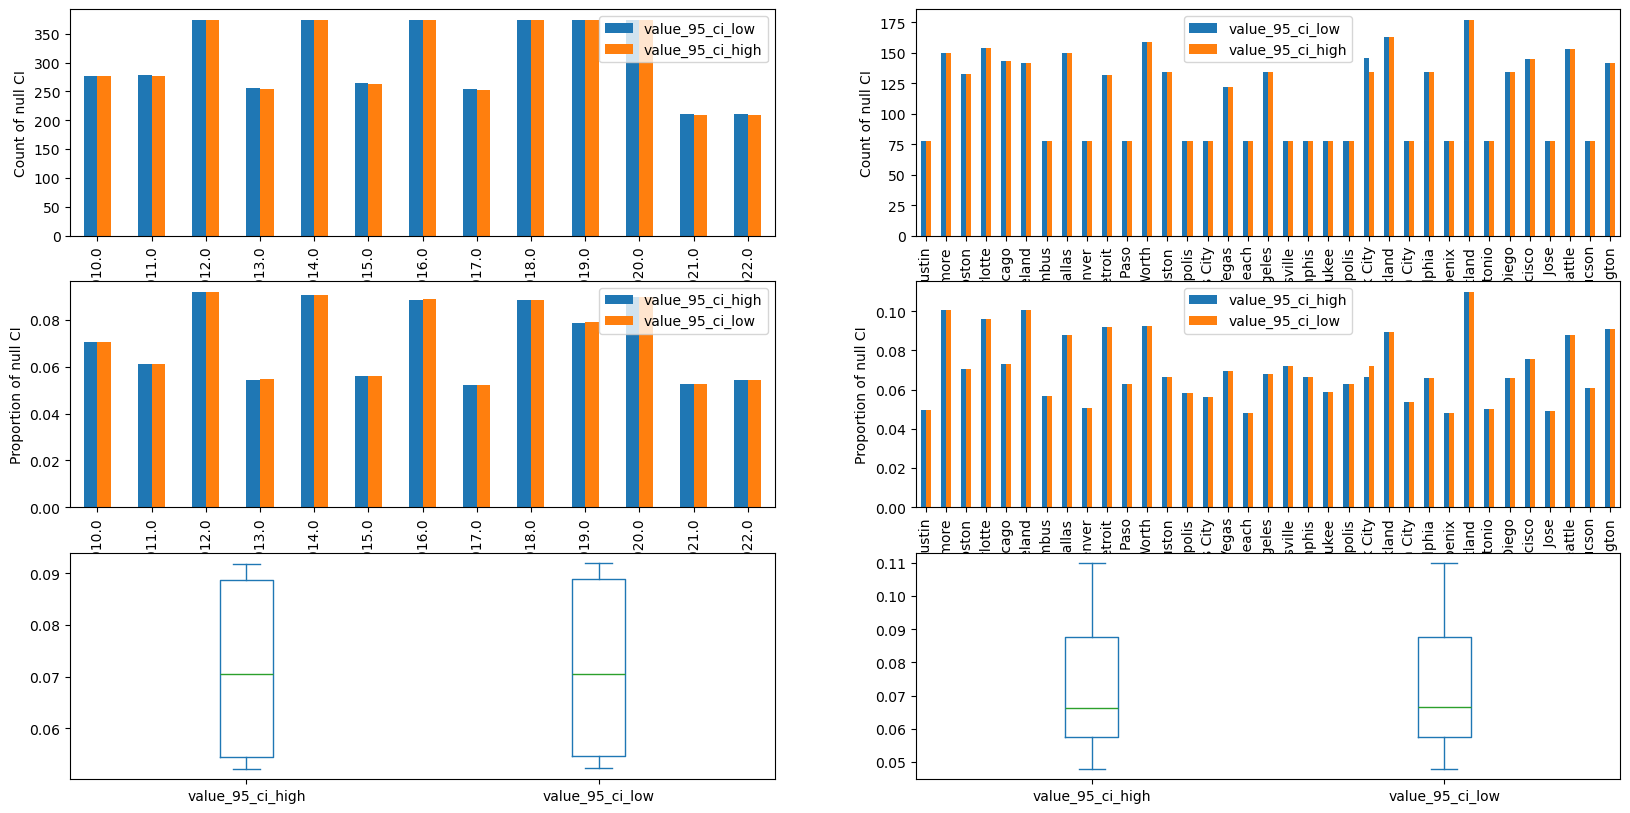

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, axes = plt.subplots(3,2,figsize=(20,10))

# 연도별 CI가 null 인것 count
null_count_year = get_nullcount(df_city,"date_label",col_list)
null_count_year.plot.bar(ax=axes[0][0])
axes[0][0].set(xlabel="Year", ylabel="Count of null CI")

# 연도 별 CI가 null / 전체 비율
null_prop_year = get_nullprop(df_city,"date_label",col_list) #count_year.rdiv(null_count_year, axis=0)
null_prop_year.plot.bar(ax=axes[1][0])
null_prop_year.plot.box(ax=axes[2][0])
axes[1][0].set(xlabel="Year", ylabel="Proportion of null CI")

# 도시별 CI가 null 인것 count
null_count_city = get_nullcount(df_city,"geo_label_city",col_list) #df_city.groupby("geo_label_city")[col_list].count().rsub(df_city.groupby("geo_label_city")[col_list].size(), axis=0)
null_count_city.plot.bar(ax=axes[0][1])
axes[0][1].set(xlabel="City", ylabel="Count of null CI")

# 도시 별 CI가 null / 전체 비율
null_prop_city = get_nullprop(df_city,"geo_label_city",col_list)
null_prop_city.plot.bar(ax=axes[1][1])
null_prop_city.plot.box(ax=axes[2][1])
axes[1][1].set(xlabel="City", ylabel="Proportion of null CI")


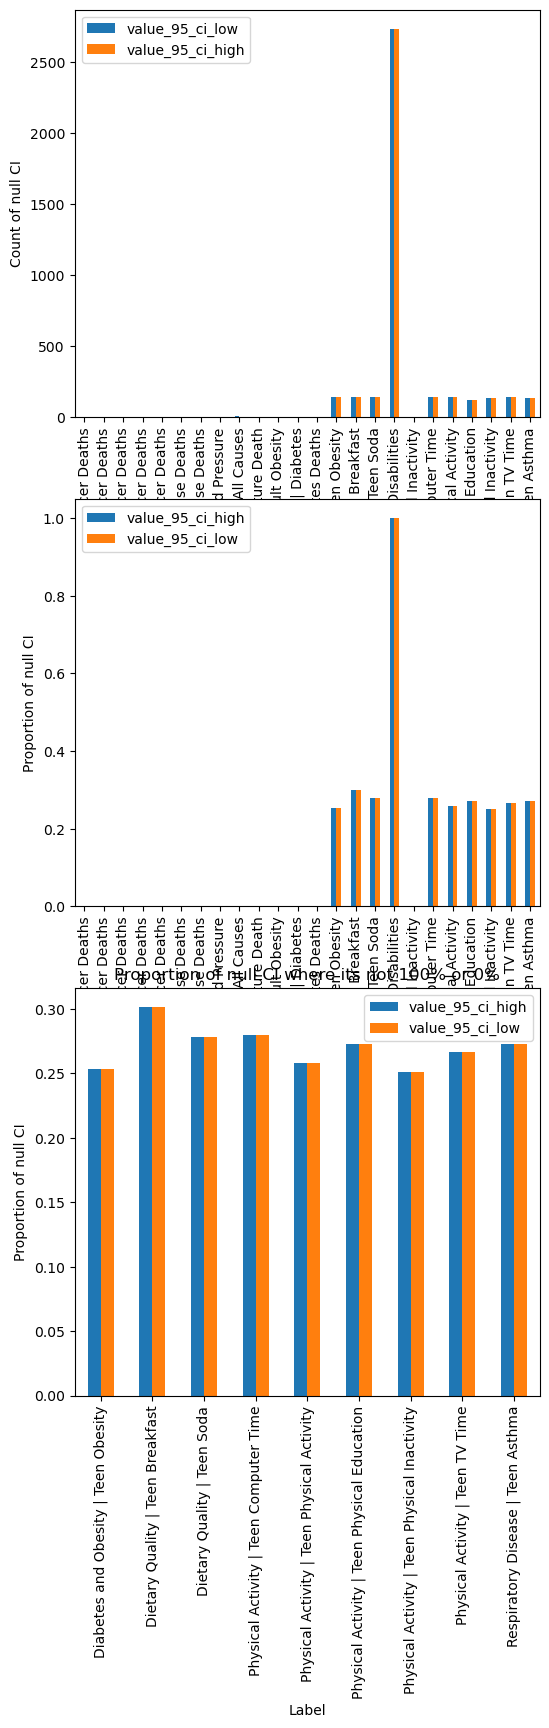

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, axes = plt.subplots(3,1,figsize=(6,18))


# Metric_label 별 CI 가 null인것 count
null_count_label = get_nullcount(df_city,"metric_label",cols=col_list)
null_count_label.plot.bar(ax=axes[0])
axes[0].set(xlabel="Label", ylabel="Count of null CI")

# Metric_label 별 CI 가 null인것 비율
null_prop_label = get_nullprop(df_city,"metric_label",cols=col_list) 
null_prop_label.plot.bar(ax=axes[1])
axes[1].set(xlabel="Label", ylabel="Proportion of null CI")

# Metric_label 별 CI 가 null인것 중 0% 또는 100%가 아닌 것의 비율
null_some_label = null_prop_label[(null_prop_label['value_95_ci_high'] != 1.0) & null_prop_label['value_95_ci_high'] != 0.0]
null_some_label.plot.bar(ax=axes[2])
axes[2].set(xlabel="Label", ylabel="Proportion of null CI", title="Proportion of null CI where its not 100% or 0%")

plt.show()

In [60]:
# ci_low 와 ci_high의 null 값 갯수가 다른것
null_count_label[null_count_label['value_95_ci_high'].notna() & (null_count_label['value_95_ci_high'] != null_count_label['value_95_ci_low'])]

,value_95_ci_low,value_95_ci_high
metric_label,,
Deaths | Deaths from All Causes,12,0


In [61]:
# 
null_count_label

,value_95_ci_low,value_95_ci_high
metric_label,,
Cancer | All Cancer Deaths,0,0
Cancer | Breast Cancer Deaths,0,0
Cancer | Colorectal Cancer Deaths,0,0
Cancer | Lung Cancer Deaths,0,0
Cancer | Prostate Cancer Deaths,0,0
Cardiovascular Disease | Cardiovascular Disease Deaths,0,0
Cardiovascular Disease | Heart Disease Deaths,0,0
Cardiovascular Disease | High Blood Pressure,0,0
Deaths | Deaths from All Causes,12,0


In [62]:
len(null_some_label.index.to_list())

9

date_label
2010.0     67
2011.0     67
2012.0    163
2013.0     45
2014.0    163
2015.0     53
2016.0    163
2017.0     43
2018.0    163
2019.0    163
2020.0    163
dtype: int64


<Axes: xlabel='date_label'>

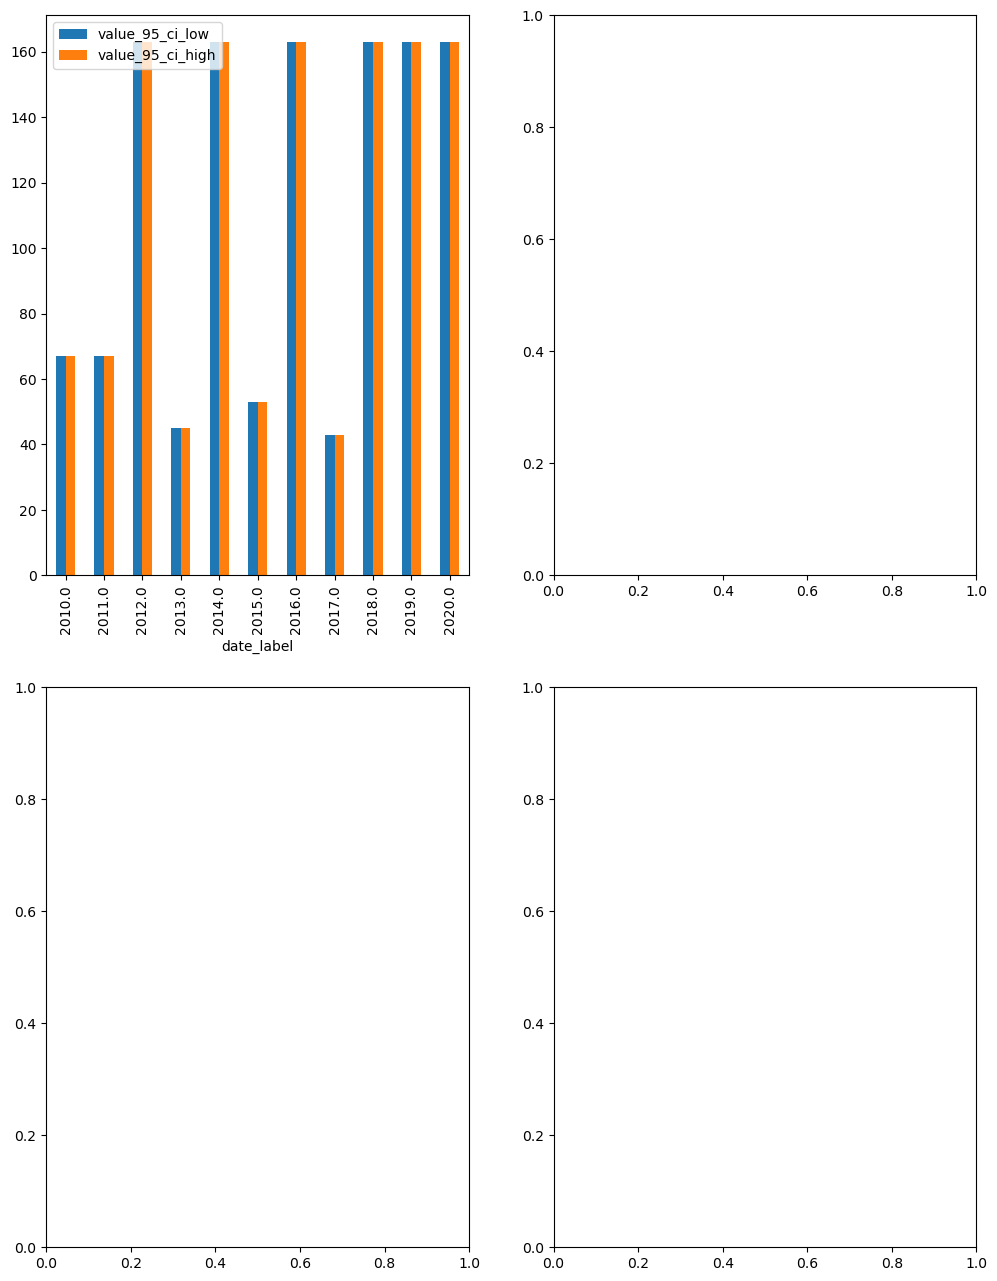

In [63]:
# CI null 비율이 0/1이 아닌것에 대한 연도/도시 세부 파악

# df_city.where(df_city["metric_label"].isin(null_some_label.index.to_list()))
# df_city[df_city["metric_label"].isin(null_some_label.index.to_list()) & df_city["value_95_ci_high"].isna()].groupby(["geo_label_city", "date_label"]).count()
fig, axes = plt.subplots(2,2,figsize=(12,16))
df_somena = df_city[df_city["date_label"].isin(null_some_label.index.to_list()) & df_city["value_95_ci_high"].isna()]

print(df_somena.groupby("date_label").size())

get_nullcount(df_somena, "date_label", cols=col_list).plot.bar(ax=axes[0][0])
# get_nullprop(df_somena, "date_label", cols=col_list).plot.bar(ax=axes[0][1])


In [64]:
df_city.groupby("metric_label")[col_list].size()

metric_label
Cancer | All Cancer Deaths                                6220
Cancer | Breast Cancer Deaths                             1773
Cancer | Colorectal Cancer Deaths                         5044
Cancer | Lung Cancer Deaths                               5475
Cancer | Prostate Cancer Deaths                           1713
Cardiovascular Disease | Cardiovascular Disease Deaths    6182
Cardiovascular Disease | Heart Disease Deaths             6125
Cardiovascular Disease | High Blood Pressure               455
Deaths | Deaths from All Causes                           6231
Deaths | Premature Death                                  2635
Diabetes and Obesity | Adult Obesity                       455
Diabetes and Obesity | Diabetes                            455
Diabetes and Obesity | Diabetes Deaths                    5476
Diabetes and Obesity | Teen Obesity                        560
Dietary Quality | Teen Breakfast                           475
Dietary Quality | Teen Soda               

In [65]:
null_count_city.describe()


,value_95_ci_low,value_95_ci_high
count,35.000000,35.000000
mean,114.142857,113.800000
std,34.973219,34.709551
min,78.000000,78.000000
25%,78.000000,78.000000
50%,132.000000,132.000000
75%,144.000000,142.500000
max,177.000000,177.000000


In [66]:
null_prop_year.describe()

,value_95_ci_high,value_95_ci_low
count,13.000000,13.000000
mean,0.071440,0.071654
std,0.016843,0.016849
min,0.052143,0.052350
25%,0.054464,0.054677
50%,0.070555,0.070555
75%,0.088662,0.088899
max,0.091781,0.092028


In [67]:
count_city = df_city.groupby("geo_label_city")[col_list].size().to_frame()
count_city = pd.concat([count_city] * 2, axis=1)
count_city.columns = ["value_95_ci_high", "value_95_ci_low"]
count_city.rdiv(null_count_city, axis=0)
# pd.merge(df_city.groupby("geo_label_city")[col_list].size().to_frame(),df_city.groupby("geo_label_city")[col_list].size().to_frame())#.rdiv(null_count_city, axis=0)
# null_count_city

,value_95_ci_high,value_95_ci_low
geo_label_city,,
Austin,0.049840,0.049840
Baltimore,0.100739,0.100739
Boston,0.070745,0.070745
Charlotte,0.096130,0.096130
Chicago,0.073108,0.073108
Cleveland,0.100781,0.100781
Columbus,0.056727,0.056727
Dallas,0.087873,0.087873
Denver,0.050518,0.050518


In [68]:
count_city

,value_95_ci_high,value_95_ci_low
geo_label_city,,
Austin,1565,1565
Baltimore,1489,1489
Boston,1880,1880
Charlotte,1602,1602
Chicago,1956,1956
Cleveland,1409,1409
Columbus,1375,1375
Dallas,1707,1707
Denver,1544,1544


In [70]:
date_label

NameError: name 'date_label' is not defined

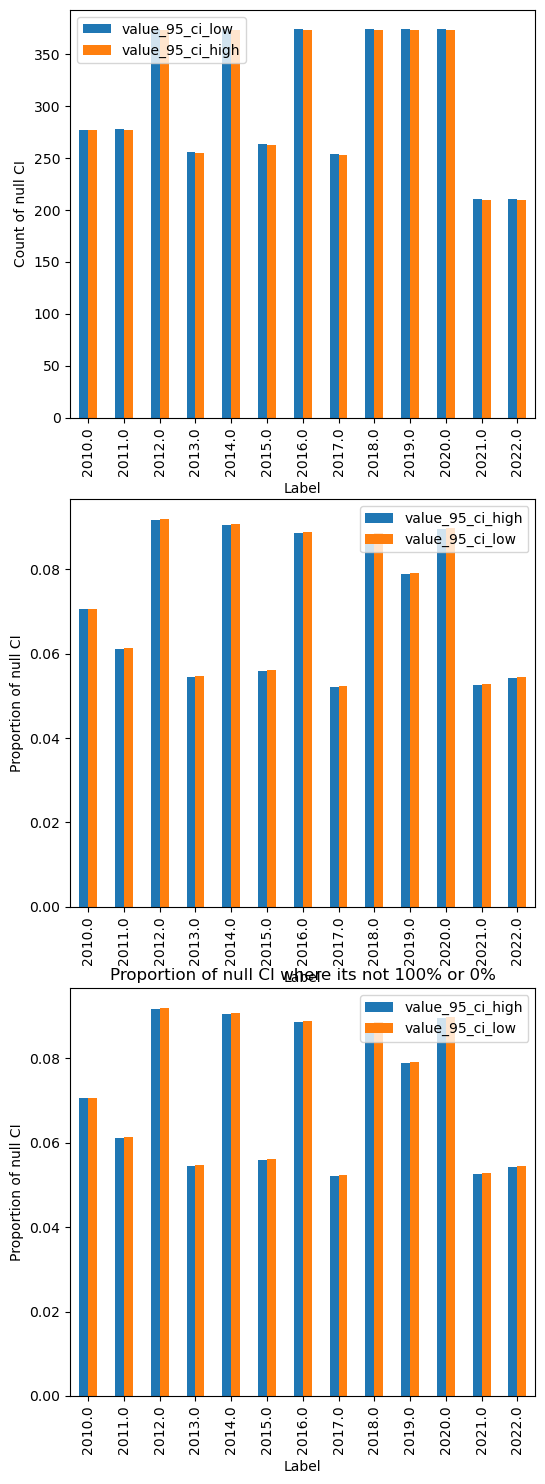

In [76]:
fig, axes = plt.subplots(3,1,figsize=(6,18))


# date_label 별 CI 가 null인것 count
null_count_label = get_nullcount(df_city,"date_label",cols=col_list)
null_count_label.plot.bar(ax=axes[0])
axes[0].set(xlabel="Label", ylabel="Count of null CI")

# date_label 별 CI 가 null인것 비율
null_prop_label = get_nullprop(df_city,"date_label",cols=col_list) 
null_prop_label.plot.bar(ax=axes[1])
axes[1].set(xlabel="Label", ylabel="Proportion of null CI")

# date_label 별 CI 가 null인것 중 0% 또는 100%가 아닌 것의 비율
null_some_label = null_prop_label[(null_prop_label['value_95_ci_high'] != 1.0) & null_prop_label['value_95_ci_high'] != 0.0]
null_some_label.plot.bar(ax=axes[2])
axes[2].set(xlabel="Label", ylabel="Proportion of null CI", title="Proportion of null CI where its not 100% or 0%")

plt.show()

NameError: name 'null_ratio_high' is not defined

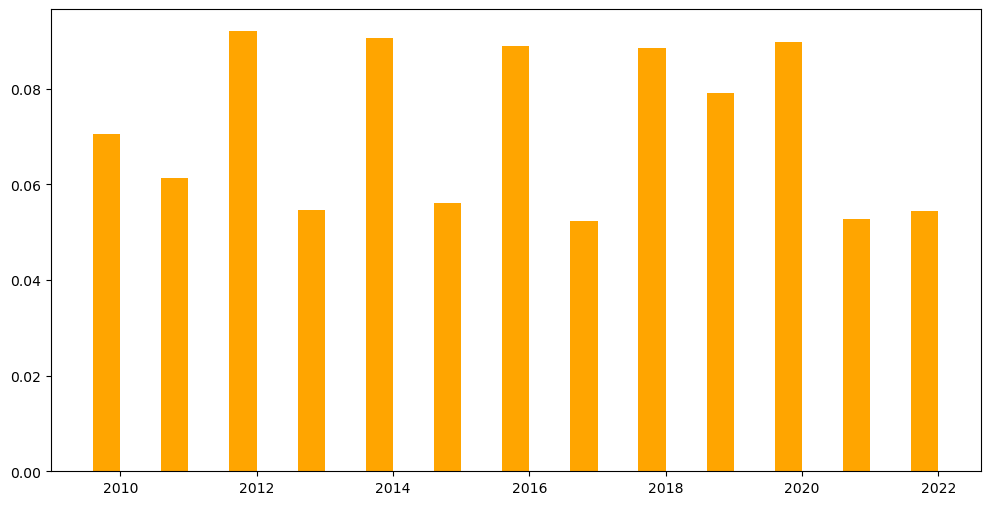

In [74]:
# date_label별로 그룹화하고, value_ci 값에 따라 비율 계산
null_ratio_by_year = df_city.groupby('date_label')['value_95_ci_high'].apply(lambda x: x.isnull().mean())
null_ratio_low = df_city.groupby('date_label')['value_95_ci_low'].apply(lambda x: x.isnull().mean())

plt.figure(figsize=(12, 6))

plt.bar(null_ratio_low.index - 0.2, null_ratio_low, width=0.4, label='value_95_ci_low', color='orange')
plt.bar(null_ratio_high.index + 0.2, null_ratio_high, width=0.4, label='value_95_ci_high', color='blue')

plt.title('Proportion of Missing CI Values by Year')
plt.xlabel('Year')
plt.ylabel('Proportion of null CI')
plt.xticks(rotation=45)
plt.legend()
plt.show()